# ALP Project Dataset Terapi Kelenjar Getah Bening
---

## Import library

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
!pip install imblearn
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Load dataset

In [34]:
# Read CSV
url = "https://raw.githubusercontent.com/ZefanyaOkta/dataset/main/Dataset_Terapi_Kelenjar_Getah_Bening.csv"
df = pd.read_csv(url)
df.head()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0


## Data preprocessing

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 87 non-null     float64
 3   Number_of_Warts      89 non-null     float64
 4   Type                 85 non-null     float64
 5   Area                 90 non-null     int64  
 6   induration_diameter  88 non-null     float64
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


In [36]:
df.describe()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
count,90.000000,90.000000,87.000000,89.000000,85.000000,90.000000,88.000000,90.000000
mean,1.544444,31.044444,7.221264,6.123596,1.752941,95.700000,14.500000,0.788889
std,0.500811,12.235435,3.151325,4.231431,0.829599,136.614643,17.378147,0.410383
min,1.000000,15.000000,1.000000,1.000000,1.000000,6.000000,2.000000,0.000000
25%,1.000000,20.250000,5.000000,2.000000,1.000000,35.500000,5.000000,1.000000
50%,2.000000,28.500000,7.750000,6.000000,2.000000,53.000000,7.000000,1.000000
75%,2.000000,41.750000,10.000000,9.000000,2.000000,80.750000,9.000000,1.000000
max,2.000000,56.000000,12.000000,19.000000,3.000000,900.000000,70.000000,1.000000


Memeriksa apakah ada baris yang duplikat

In [37]:
df.duplicated().any()

False

Memeriksa apakah ada missing values

In [38]:
df.isna().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

Mengisi null values dengan mean dan mode. Time diisi mean, Number of warts diisi mean, type diisi mode karena categorical, induration diameter diisi mean.

In [39]:
df['Time'] = df['Time'].fillna(df['Time'].mean())
df['Number_of_Warts'] = df['Number_of_Warts'].fillna(df['Number_of_Warts'].mean())
df['Type'] = df['Type'].fillna(df['Type'].mode()[0])
df['induration_diameter'] = df['induration_diameter'].fillna(df['induration_diameter'].mean())

In [40]:
df.isna().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

In [41]:
df.corr()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
gender,1.000000,0.043682,-0.013548,0.106344,-0.104623,-0.115664,0.014364,0.018831
age,0.043682,1.000000,0.186786,0.001748,-0.056636,-0.064334,-0.019882,-0.188314
Time,-0.013548,0.186786,1.000000,0.041960,-0.263967,-0.045934,-0.190836,-0.362780
Number_of_Warts,0.106344,0.001748,0.041960,1.000000,0.152532,-0.111766,0.077547,-0.037580
Type,-0.104623,-0.056636,-0.263967,0.152532,1.000000,-0.042080,0.209413,0.083396
Area,-0.115664,-0.064334,-0.045934,-0.111766,-0.042080,1.000000,0.115548,0.043349
induration_diameter,0.014364,-0.019882,-0.190836,0.077547,0.209413,0.115548,1.000000,-0.026293
Result_of_Treatment,0.018831,-0.188314,-0.362780,-0.037580,0.083396,0.043349,-0.026293,1.000000


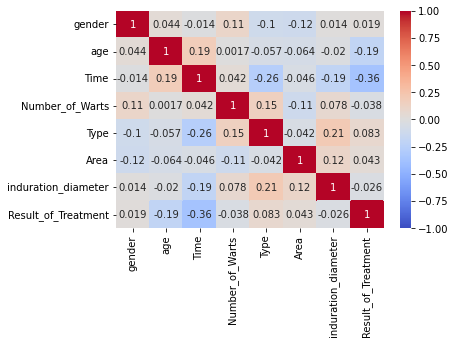

In [42]:
import seaborn as sns
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, vmin=-1, vmax=1)
plt.show()

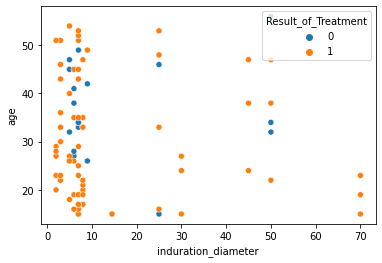

In [43]:
sns.scatterplot(data = df, x ='induration_diameter', y = 'age', hue = 'Result_of_Treatment')

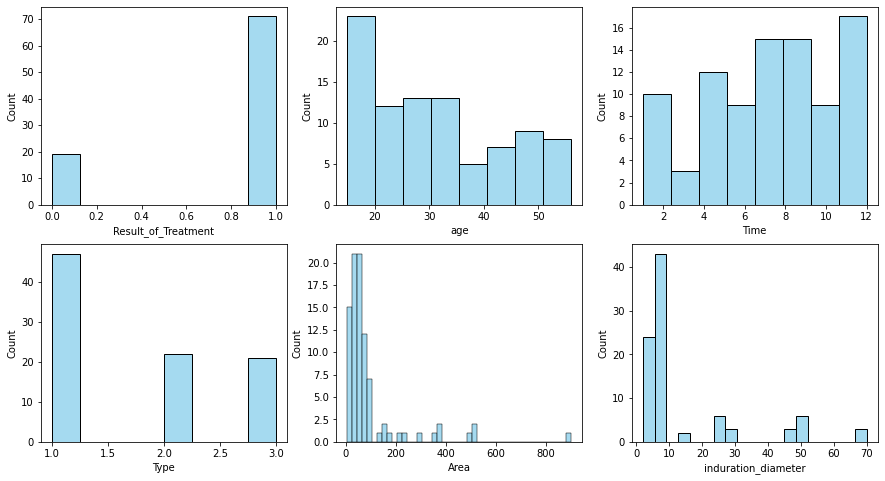

In [44]:
fig,axes = plt.subplots(2,3,figsize=(15,8))
sns.histplot(data=df,x='Result_of_Treatment',ax=axes[0,0],color='skyblue')
sns.histplot(data=df,x='age',ax=axes[0,1],color='skyblue')
sns.histplot(data=df,x='Time',ax=axes[0,2],color='skyblue')
sns.histplot(data=df,x='Type',ax=axes[1,0],color='skyblue')
sns.histplot(data=df,x='Area',ax=axes[1,1],color='skyblue')
sns.histplot(data=df,x='induration_diameter',ax=axes[1,2],color='skyblue')
plt.show()

Handling Imbalanced Dataset

In [45]:
# SMOTE
from imblearn.over_sampling import SMOTE

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [46]:
# Independent Variabel
X = df.drop(['Result_of_Treatment'], axis=1)

# Dependent Variabel
y = df['Result_of_Treatment']

In [47]:
sm = SMOTE(random_state=0)

# sampling SMOTE
x_sampling, y_sampling = sm.fit_resample(X, y)

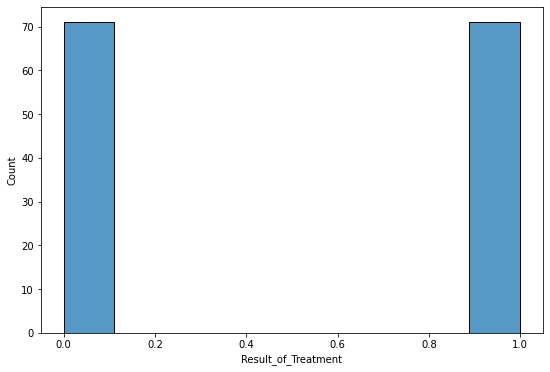

In [48]:
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=y_sampling)
plt.show()

In [49]:
df2 = pd.concat([x_sampling, y_sampling], axis=1)
df2

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.000000,6.000000,1.000000,30,25.000000,0
1,1,27,11.750000,6.123596,1.000000,208,6.000000,0
2,1,32,12.000000,9.000000,1.000000,43,50.000000,0
3,1,33,1.750000,7.000000,2.000000,379,7.000000,0
4,1,34,5.000000,7.000000,3.000000,64,7.000000,0
...,...,...,...,...,...,...,...,...
137,1,31,6.748907,6.682017,2.364034,59,7.635966,0
138,1,42,11.707131,8.142630,1.000000,89,17.129003,0
139,2,40,11.064147,10.679263,2.064147,21,5.935853,0
140,1,34,11.692472,10.617193,1.615056,88,6.000000,0


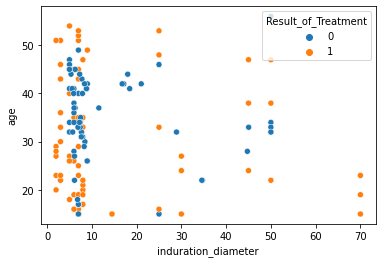

In [50]:
sns.scatterplot(data = df2, x ='induration_diameter', y = 'age', hue = 'Result_of_Treatment')

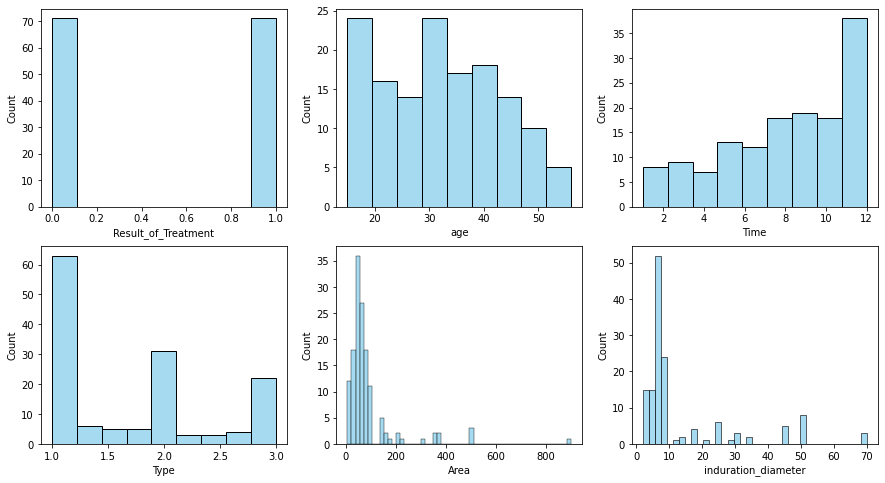

In [51]:
fig,axes = plt.subplots(2,3,figsize=(15,8))
sns.histplot(data=df2,x='Result_of_Treatment',ax=axes[0,0],color='skyblue')
sns.histplot(data=df2,x='age',ax=axes[0,1],color='skyblue')
sns.histplot(data=df2,x='Time',ax=axes[0,2],color='skyblue')
sns.histplot(data=df2,x='Type',ax=axes[1,0],color='skyblue')
sns.histplot(data=df2,x='Area',ax=axes[1,1],color='skyblue')
sns.histplot(data=df2,x='induration_diameter',ax=axes[1,2],color='skyblue')
plt.show()

In [52]:
# Independent Variabel
X = df2.drop(['Result_of_Treatment'], axis=1)

# Dependent Variabel
y = df2['Result_of_Treatment']

In [53]:
print('Sebelum di SMOTE')
print(df['Result_of_Treatment'].value_counts())
print('\nSetelah di SMOTE')
print(df2['Result_of_Treatment'].value_counts())

Sebelum di SMOTE
1    71
0    19
Name: Result_of_Treatment, dtype: int64

Setelah di SMOTE
0    71
1    71
Name: Result_of_Treatment, dtype: int64


Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [54]:
from sklearn.model_selection import train_test_split

# split into 90:10 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

Melakukan fitur scaling pada variabel X_train dan X_test.

In [55]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Linear Regression

 Membuat summary model linear regression dengan library statsmodels dengan metode OLS

In [56]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Result_of_Treatment   R-squared (uncentered):                   0.569
Model:                             OLS   Adj. R-squared (uncentered):              0.546
Method:                  Least Squares   F-statistic:                              25.41
Date:                 Wed, 04 Jan 2023   Prob (F-statistic):                    6.89e-22
Time:                         14:52:11   Log-Likelihood:                         -92.597
No. Observations:                  142   AIC:                                      199.2
Df Residuals:                      135   BIC:                                      219.9
Df Model:                            7                                                  
Covariance Type:             nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------

Membuat model linear regressionnya, kemudian menunjukkan intercept beserta coefficient dari setiap variabel independen (X) nya.

In [57]:
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)
intercept = regressor.intercept_
coefficient = regressor.coef_

print('Intercept = {:0.4f}'.format(intercept))
print('Coefficient gender = {:0.4f}'.format(coefficient[0]))
print('Coefficient age = {:0.4f}'.format(coefficient[1]))
print('Coefficient Time = {:0.4f}'.format(coefficient[2]))
print('Coefficient Number_of_Warts = {:0.4f}'.format(coefficient[3]))
print('Coefficient Type = {:0.4f}'.format(coefficient[4]))
print('Coefficient Area = {:0.4f}'.format(coefficient[5]))
print('Coefficient induration_diameter = {:0.4f}'.format(coefficient[6]))

Intercept = 1.0017
Coefficient gender = 0.1612
Coefficient age = -0.0054
Coefficient Time = -0.0648
Coefficient Number_of_Warts = -0.0004
Coefficient Type = -0.0376
Coefficient Area = 0.0003
Coefficient induration_diameter = -0.0000


Evaluating Goodness of Fit using RMSE

In [58]:
from sklearn.metrics import mean_squared_error

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Squared Error (RMSE):  0.39931135106290866


In [59]:
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.33562685380131063

The accuracy of this model is 33,56 %.

# Classification

## Logistic Regression

Bangun model dan ukur accuracy nya dengan random state = 0

In [60]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Uji model dengan dataset test

In [61]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1 1 1 0 0 1 1 1 0 1 1 0 1 0 0]


Cetak confusion matrix dan akurasi modelnya

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[4 2]
 [2 7]]
Accuracy Score:  0.7333333333333333


Berdasarkan confusion matrix hasil dari prediksi klasifikasi di atas diketahui bahwa yang sesuai prediksi benar sebanyak 4 dan yang sesuai prediksi salah adalah sebanyak 7 dengan masing-masing selisih kesalahan sebanyak 2 untuk yang diprediksi salah dan 2 untuk yang diprediksi benar. Sedangkan skor akurasinya adalah 73.3%

## K-Nearest Neighbour (K-NN) Classifier

Membuat model KNN berdasarkan data training yang sudah dibuat di tahap preprocess dan menggunakan metric pengukuran jarak 'euclidean'

In [63]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(metric = "euclidean")
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [64]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 1 0 0 0 1 1 0 1 1 0 1 0 0]


Cetak confussion matrix dan akurasi modelnya

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[6 0]
 [2 7]]
Accuracy Score:  0.8666666666666667


Berdasarkan confusion matrix hasil dari prediksi klasifikasi di atas diketahui bahwa yang sesuai prediksi benar sebanyak 6 dan yang sesuai prediksi salah adalah sebanyak 7 dengan masing-masing selisih kesalahan sebanyak 0 untuk yang diprediksi salah dan 2 untuk yang diprediksi benar. Sedangkan skor akurasinya adalah 86,6%

## Naive Bayes

Membuat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [66]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

Uji hasil model dengan data test

In [67]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 0 0 1 0 1 0 0 1 1 0 1 0 0]


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[6 0]
 [3 6]]
Accuracy Score:  0.8


Berdasarkan confusion matrix hasil dari prediksi klasifikasi di atas diketahui bahwa yang sesuai prediksi benar sebanyak 6 dan yang sesuai prediksi salah adalah sebanyak 6 dengan masing-masing selisih kesalahan sebanyak 0 untuk yang diprediksi salah dan 3 untuk yang diprediksi benar. Sedangkan skor akurasinya adalah 80%

Kesimpulan = Dari model-model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah K-Nearest Neighbor yaitu 86,6%

# Clustering

## K-Means

Dengan elbow method, tentukan jumlah cluster yang ingin dibentuk dengan elbow range(1, 11)

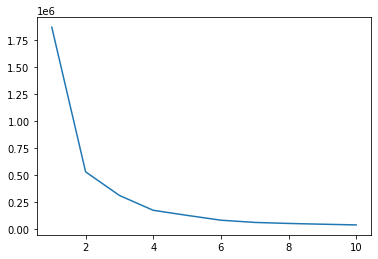

In [69]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle

wcss = []
for k in range(1,11):
    kmeans = KMeans(k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.show()

Training model K-Means pada dataset dengan jumlah cluster yang ditentukan

In [70]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator
findknee = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
print("The best k for your model is ",findknee.elbow)

The best k for your model is  3


In [71]:
from sklearn.cluster import AgglomerativeClustering
threecl = AgglomerativeClustering(3)
cls = threecl.fit_predict(X)
df2['Cluster'] = cls
df2.head(5)

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment,Cluster
0,1,15,11.00,6.000000,1.0,30,25.0,0,0
1,1,27,11.75,6.123596,1.0,208,6.0,0,0
2,1,32,12.00,9.000000,1.0,43,50.0,0,0
3,1,33,1.75,7.000000,2.0,379,7.0,0,1
4,1,34,5.00,7.000000,3.0,64,7.0,0,0


Menampilkan dalam bentuk dataframe kesimpulan dari cluster:

kolom bertipe categorical: modus (gunakan pd.Series.mode untuk mencari modus)
kolom bertipe continous : mean
Hasil cluster: count

In [72]:
df2["Cluster"] = cls

df2.groupby("Cluster").agg(gender = ('gender', pd.Series.mode),
                                 age = ('age', 'mean'),
                                 Time = ('Time', 'mean'),
                                 Number_of_Warts = ('Number_of_Warts', 'mean'),
                              Type = ('Type', pd.Series.mode),
                              Area = ('Area', 'mean'),
                              induration_diameter = ('induration_diameter', 'mean'),
                              Result_of_Treatment = ('Result_of_Treatment', pd.Series.mode),
                                 count=("Cluster", 'count'))

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment,count
Cluster,,,,,,,,,
0,1,32.428571,8.114256,6.388604,1.0,62.962406,13.879897,0,133
1,1,33.125000,6.935626,6.459086,1.0,407.625000,6.112988,1,8
2,1,15.000000,3.000000,2.000000,3.0,900.000000,70.000000,1,1


## Hierarchical Clustering

Plot Dendrogram untuk membantu menentukan jumlah cluster menggunakan ward method.

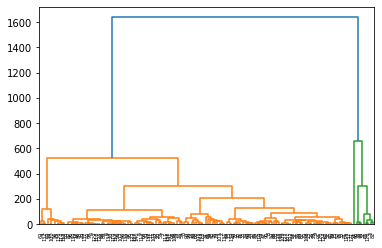

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram(linkage(X,method='ward'))
plt.show()

Melakukan hierarchical clustering dengan metric Euclidean dan jumlah cluster sama dengan cluster Kmeans

In [74]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
hie = hc.fit_predict(X)
df2['Cluster'] = hie
df2.head(5)

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment,Cluster
0,1,15,11.00,6.000000,1.0,30,25.0,0,0
1,1,27,11.75,6.123596,1.0,208,6.0,0,0
2,1,32,12.00,9.000000,1.0,43,50.0,0,0
3,1,33,1.75,7.000000,2.0,379,7.0,0,1
4,1,34,5.00,7.000000,3.0,64,7.0,0,0


Menampilkan dalam bentuk dataframe kesimpulan dari cluster dengan kriteria sama dengan kesimpulan di atas

In [75]:
df2["Cluster"] = hie
df2.groupby("Cluster").agg(gender = ('gender', pd.Series.mode),
                                 age = ('age', 'mean'),
                                 Time = ('Time', 'mean'),
                                 Number_of_Warts = ('Number_of_Warts', 'mean'),
                              Type = ('Type', pd.Series.mode),
                              Area = ('Area', 'mean'),
                              induration_diameter = ('induration_diameter', 'mean'),
                              Result_of_Treatment = ('Result_of_Treatment', pd.Series.mode),
                                 count=("Cluster", 'count'))

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment,count
Cluster,,,,,,,,,
0,1,32.428571,8.114256,6.388604,1.0,62.962406,13.879897,0,133
1,1,33.125000,6.935626,6.459086,1.0,407.625000,6.112988,1,8
2,1,15.000000,3.000000,2.000000,3.0,900.000000,70.000000,1,1
